# Load

In [58]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import cross_validate

# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from scipy.stats import spearmanr

In [2]:
data = pd.read_csv("data/CarPrice_Assignment.csv")

# Data Preparation 

***Rows***
- Null values
- Remove duplicates
- Outlier removal
- Data sampling

***Columns***
- Feature selection
- Polynomial features
- One hot encoding

***Values***
- Data scaling
- Change distribution
- Imputation

***Columns + Values***
- Dimensionality reduction

***Rows + Values***
- Row consolidation

## Rows

### Null values

In [3]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Duplicates

In [4]:
data.duplicated().sum()

0

There are no null values or duplicated rows, so we don't need to impute any values or remove rows at this stage. Next, let's look to see if there are any outliers in the data.

### Outliers

An outlier is an observation that is unlike the other observations. It is rare, or distinct, or does not fit in some way.

We will generally define outliers as samples that are exceptionally far from the mainstream of the data.

There is no precise way to define and identify outliers in general because of the specifics of each dataset. Instead, you, or a domain expert, must interpret the raw observations and decide whether a value is an outlier or not.

Nevertheless, we can use statistical methods to identify observations that appear to be rare or unlikely given the available data.

This does not mean that the values identified are outliers and should be removed. But, the tools described in this tutorial can be helpful in shedding light on rare events that may require a second look.

#### Method 1 - Standard Deviation Method

Given mu and sigma, a simple way to identify outliers is to compute a z-score for every xi, which is defined as the number of standard deviations away xi is from the mean. Data values that have a z-score sigma greater than a threshold, for example, of three, are declared to be outliers.

In [43]:
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove('car_ID')
numeric_cols

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

We can calculate the mean and standard deviation of a given sample, then calculate the cut-off for identifying outliers as more than 3 standard deviations from the mean.

In [44]:
numeric_with_price = data[numeric_cols]
data_mean, data_std = mean(numeric_with_price), std(numeric_with_price)
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

We can then identify outliers as those examples that fall outside of the defined lower and upper limits.

In [45]:
# identify outliers
outliers_idx = []
outlier_col = []
for i, col in enumerate(numeric_cols):
    for row, value in enumerate(numeric_with_price[col]):
        if value < lower[i] or value > upper[i]:
            outliers_idx.append(row)
            outlier_col.append(col)

In [46]:
outliers_idx[:5]

[73, 47, 48, 49, 73]

In [47]:
outlier_col[:5]

['wheelbase', 'enginesize', 'enginesize', 'enginesize', 'enginesize']

In [48]:
# check outliers 
outliers_df = data.copy()
outliers_df = outliers_df.iloc[outliers_idx]
outliers_df['outlier_reason'] = outlier_col
outliers_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,outlier_reason
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0,wheelbase
47,48,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,...,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0,enginesize
48,49,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,...,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0,enginesize
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,...,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0,enginesize
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0,enginesize
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0,enginesize
111,112,0,peugeot 504,gas,std,four,sedan,rwd,front,107.9,...,mpfi,3.46,2.19,8.4,95,5000,19,24,15580.0,stroke
113,114,0,peugeot 504,gas,std,four,wagon,rwd,front,114.2,...,mpfi,3.46,2.19,8.4,95,5000,19,24,16695.0,stroke
134,135,3,saab 99le,gas,std,two,hatchback,fwd,front,99.1,...,mpfi,2.54,2.07,9.3,110,5250,21,28,15040.0,stroke
63,64,0,mazda glc deluxe,diesel,std,four,sedan,fwd,front,98.8,...,idi,3.39,3.39,22.7,64,4650,36,42,10795.0,compressionratio


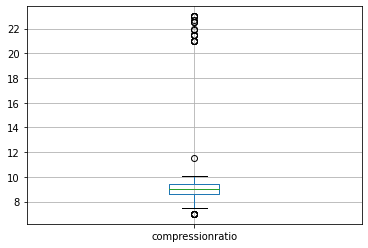

In [11]:
data[['compressionratio']].boxplot();

Leave for now

#### Method 2 - Automatic Outlier Detection

In [49]:
X_numeric = numeric_df.drop(columns=['price'])
y = data['price']
X_train_numeric, X_test_numeric, y_train, y_test = train_test_split(X_numeric, y, test_size=0.33, random_state=1)

In [51]:
# summarize the shape of the train and test sets
print(X_train_numeric.shape, X_test_numeric.shape, y_train.shape, y_test.shape)

(137, 14) (68, 14) (137,) (68,)


In this case, we will fit a linear regression algorithm and evaluate model performance by training the model on the test dataset and making a prediction on the test data and evaluate the predictions using the mean absolute error (MAE).

In [52]:
# fit the model
model = LinearRegression()

# evaluate the model
cv_results = cross_validate(model, X_train_numeric, y_train, cv=5)

#save mean score to variable
score = cv_results['test_score'].mean()
score

0.782461679897507

In [53]:
model = LinearRegression()
model.fit(X_train_numeric, y_train)
# # evaluate the model
yhat = model.predict(X_test_numeric)
# evaluate predictions
r2 = r2_score(y_test, yhat)
print('r2: %.3f' % r2)

r2: 0.817


Next, we can try removing outliers from the training dataset.

The expectation is that the outliers are causing the linear regression model to learn a bias or skewed understanding of the problem, and that removing these outliers from the training set will allow a more effective model to be learned.

We can achieve this by defining the LocalOutlierFactor model and using it to make a prediction on the training dataset, marking each row in the training dataset as normal (1) or an outlier (-1). We will use the default hyperparameters for the outlier detection model, although it is a good idea to tune the configuration to the specifics of your dataset.

In [54]:
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

# select all rows that are not outliers
mask = yhat != -1
X_train_numeric, y_train = X_train_numeric[mask], y_train[mask]

In [55]:
# summarize the shape of the updated training dataset
print(X_train_numeric.shape, y_train.shape)

# fit the model
model = LinearRegression()

# evaluate the model
cv_results = cross_validate(model, X_train_numeric, y_train, cv=5)

#save mean score to variable
score_outliers_removed = cv_results['test_score'].mean()
score_outliers_removed

(122, 14) (122,)


0.7432984861727702

It seems that removing outliers using this automatic detection technique has reduced the score of the model. This is most likely because of the limited amount of data.

## Columns

Feature selection

Polynomial features

One hot encoding

### Feature selection

***Feature selection*** methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

One way to think about feature selection methods are in terms of ***supervised*** and ***unsupervised*** methods.

The difference has to do with whether features are selected based on the target variable or not. Unsupervised feature selection techniques ignores the target variable, such as methods that remove redundant variables using correlation. Supervised feature selection techniques use the target variable, such as methods that remove irrelevant variables..

Another way to consider the mechanism used to select features which may be divided into ***wrapper*** and ***filter*** methods. These methods are almost always supervised and are evaluated based on the performance of a resulting model on a hold out dataset.

Wrapper feature selection methods create many models with different subsets of input features and select those features that result in the best performing model according to a performance metric. 

Filter feature selection methods use statistical techniques to evaluate the relationship between each input variable and the target variable, and these scores are used as the basis to choose (filter) those input variables that will be used in the model.

Finally, there are some machine learning algorithms that perform feature selection automatically as part of learning the model. We might refer to these techniques as ***intrinsic*** feature selection methods.

This includes algorithms such as penalized regression models like Lasso and decision trees, including ensembles of decision trees like random forest.

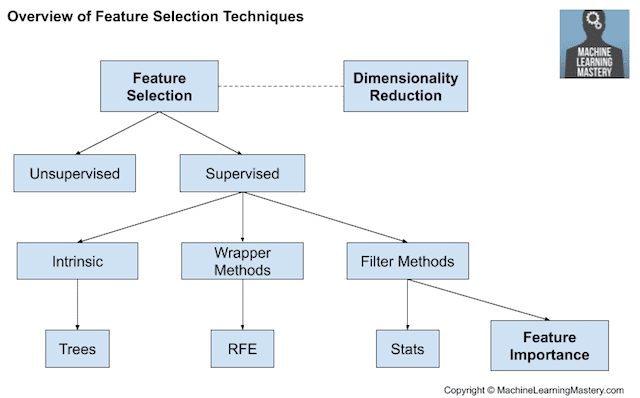

#### Filter based feature selection

Most of these techniques are univariate, meaning that they evaluate each predictor in isolation. In this case, the existence of correlated predictors makes it possible to select important, but redundant, predictors. The obvious consequences of this issue are that too many predictors are chosen and, as a result, collinearity problems arise.

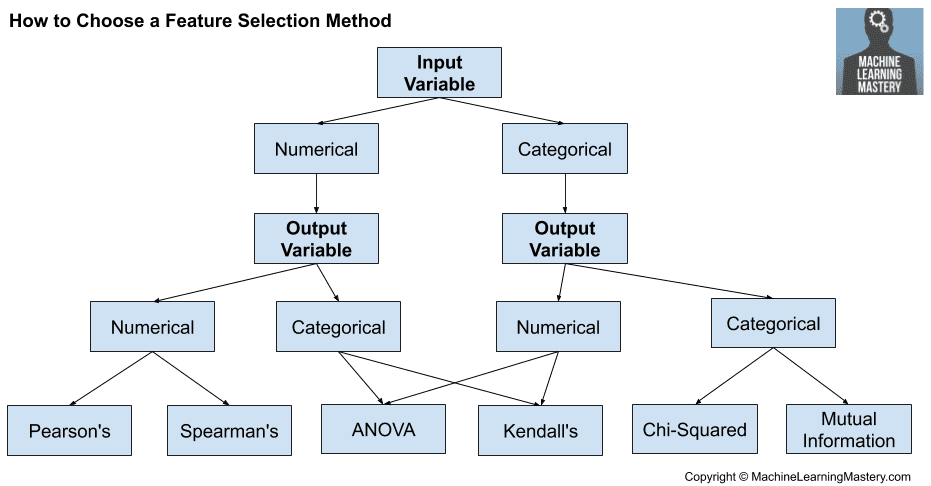

We'll look at numeric variables now and come back to categorical variables after one-hot-encoding.

##### SelectKBest

In [97]:
# define feature selection
selector = SelectKBest(score_func=f_classif, k=4)

# apply feature selection
selector.fit_transform(X_numeric, y)

cols = selector.get_support(indices=True)
X_numeric_new = X_numeric.iloc[:,cols]

In [98]:
X_train_numeric_new, X_test_numeric_new, y_train, y_test = train_test_split(X_numeric_new, y, test_size=0.33, random_state=1)

In [99]:
model = LinearRegression()

# evaluate the model
cv_results = cross_validate(model, X_train_numeric_new, y_train, cv=5)

#save mean score to variable
score = cv_results['test_score'].mean()
score

0.7936146902124095

Choosing best 4 numeric variables gives the best results.

##### Pearson's

##### Spearman's

## Values

In [ ]:
sns.kdeplot(x=data['enginesize']);

In [ ]:
data[['enginesize']].boxplot();

Use robust scaling as there are some outliers

In [ ]:
from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler() # Instanciate Robust Scaler

r_scaler.fit(data[['enginesize']]) # Fit scaler to feature

data['enginesize'] = r_scaler.transform(data[['enginesize']]) #Scale

data.head()

In [ ]:
sns.kdeplot(x=data['enginesize']);